In [1]:
import numpy as np
import pandas as pd
from seaborn import heatmap
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir('../ensemble/')

In [3]:
## XGB:
xgb_res = pd.read_csv('xgb.csv')

## Surprise 2: https://www.kaggle.com/tunguz/surprise-me-2
## Use without combining dumb part
surprise_res = pd.read_csv('surprise_me.csv')

## The "dumb" - weighted mean comparison: https://www.kaggle.com/zeemeen/weighted-mean-comparisons-lb-0-497-1st
dumb_res = pd.read_csv('dumb.csv')

## RidgeCV: https://www.kaggle.com/yixinsunn/simple-ridge-regression-lb-0-497
ridge_res = pd.read_csv('ridge.csv')

## LGB: https://www.kaggle.com/johannesss/multiple-lightgbm
## use similar params
lgb_res = pd.read_csv('lgb.csv')

## H2O: https://www.kaggle.com/pranav84/surprise-me-h2o-automl-version
h2o_res = pd.read_csv('h2o.csv')

## LSTM autoencoder: https://www.kaggle.com/ievgenvp/lstm-encoder-decoder-via-keras-lb-0-5
## Use 100 epochs
lstm_res = pd.read_csv('lstm.csv')

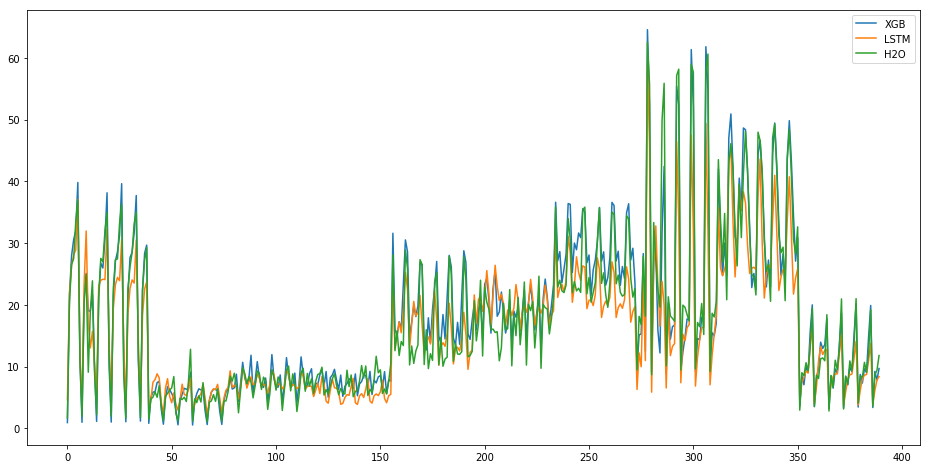

In [7]:
N = 390
plt.figure(figsize=(16,8))
plt.plot(range(N), xgb_res.visitors[:N], label = 'XGB')
plt.plot(range(N), lstm_res.visitors[:N], label = 'LSTM')
# plt.plot(range(N), lgb_res2.visitors[:N], label = 'H2O')

# plt.plot(range(N), ridge_res_493.visitors[:N], label = 'RIDGE')
# plt.plot(range(N), lgb_res_478.visitors[:N], label = 'LGB')
# plt.plot(range(N), dumb.visitors[:N], label = 'dumb')
plt.plot(range(N), h2o_res.visitors[:N], label = 'H2O')
plt.legend()

In [9]:
## As we found that give a bit more weight can improve the public LB,
## we did calibration to use 1.03 overall weight here
sub = surprise_res.copy()
sub.visitors = (surprise_res.visitors * 0.15 + \
                h2o_res.visitors * 0.15 + \
                lgb_res.visitors * 0.05 + \
                ridge_res.visitors * 0.05) * 0.25 + \
                lstm_res.visitors * 0.4 + \
                xgb_res.visitors * 0.43 + \
                dumb_res.visitors * 0.1
sub[['id', 'visitors']].to_csv('final_ensemble.csv', index=False)